# Załadowanie bibliotek oraz danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("./mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Podział danych na zbiór treningowy i testowy


- X to zbiór cech, które będą używane do klasyfikacji
- y to zbiór etykiet, które chcemy przewidzieć

Dane podzielę w proporcji 70% na zbiór treningowy i 30% na zbiór testowy, za pomocą funkcji `train_test_split` z biblioteki `sklearn.model_selection`. Ustawiam `random_state` na 0, aby wyniki były deterministyczne.

In [2]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
print(X_train.shape[0], X_test.shape[0])

5686 2438


Liczba próbek w zbiorze treningowym i testowym wynosi odpowiednio 5686 i 2438, więc wszystko się zgadza.


# Nakarmienie modelu danymi testowymi
Importuję przygotowaną wcześniej klasę `MultinomialNaiveBayesClassifier` i tworzę instancję klasyfikatora, podając mu dane treningowe i testowe. Następnie wywołuję metodę `fit`, która trenuje model.

In [4]:
from MultinomialNaiveBayesClassifier import MultinomialNaiveBayesClassifier
model = MultinomialNaiveBayesClassifier(X_train, X_test, y_train, y_test)
model.fit()

# Wykonywanie przewidywań na wyuczonym modelu
Wywołam metodę `predict` na modelu, aby dokonać predykcji na zbiorze testowym. Następnie wyświetlam pierwsze 5 predykcji, aby zobaczyć jak wyglądają.

In [6]:
predictions = model.predict(X_test)

['p', 'e', 'e', 'e', 'e']

# Sprawdzenie dokładności modelu

In [7]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Dokładność na zbiorze treningowym: {train_score}")
print(f"Dokładność na zbiorze testowym: {test_score}")
print(abs(train_score - test_score))

Dokładność na zbiorze treningowym: 0.9549771368272951
Dokładność na zbiorze testowym: 0.9634946677604594
0.008517530933164319


Jak widać, dokładność na zbiorze treningowym wynosi 0.9550, a na zbiorze testowym 0.9635. Różnica między nimi wynosi 0.0085, co oznacza, że model jest dobrze dopasowany do danych treningowych i nie ma problemu z overfittingiem.

In [9]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)

report = classification_report(y_test, predictions, target_names=['Jadalny', 'Trujący'])

print(report)

              precision    recall  f1-score   support

     Jadalny       0.94      1.00      0.97      1272
     Trujący       1.00      0.93      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.97      0.96      0.96      2438
weighted avg       0.97      0.96      0.96      2438



Wykorzystując funkcję `classification_report` z biblioteki `sklearn.metrics`, uzyskałem raport klasyfikacji, który zawiera miary takie jak:
- precyzja - stosunek poprawnie przewidzianych pozytywnych obserwacji do wszystkich pozytywnych obserwacji
- czułość - stosunek poprawnie przewidzianych pozytywnych obserwacji do wszystkich obserwacji w rzeczywistej klasie
- f1-score - średnia harmoniczna precyzji i czułości

Te najbardziej nas interesujące miary, czyli precyzja i czułość, wynoszą odpowiednio 0.94 i 1.00 dla klasy jadalny oraz 1.00 i 0.93 dla klasy trujący. Można zatem stwierdzić, że model działa bardzo dobrze i jest w stanie rozróżnić grzyby jadalne od trujących z bardzo wysoką dokładnością.

# Macierz konfuzji
Dobrym sposobem na zobrazowanie wyników klasyfikacji jest wykorzystanie macierzy konfuzji. Jest to tabela, która pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy. Wartości na przekątnej macierzy oznaczają poprawnie sklasyfikowane próbki, a wartości poza przekątną oznaczają błędnie sklasyfikowane próbki.

W implementacji poniżej wykorzystuję funkcję `confusion_matrix` z biblioteki `sklearn.metrics`, aby uzyskać macierz konfuzji. Następnie tworzę DataFrame z wynikami, aby móc wyświetlić je w formie tabeli.


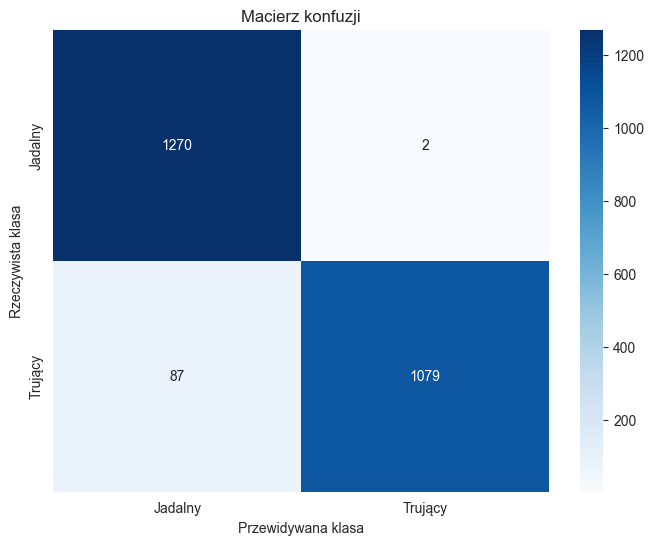

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm, index=['Jadalny', 'Trujący'], columns=['Jadalny', 'Trujący'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywana klasa')
plt.ylabel('Rzeczywista klasa')
plt.show()

Jak widać na powyższym wykresie, model próbki z klasy jadalny błędnie sklasyfikował 2 razy, a z klasy trujący - 87 próbek jako jadalne.

# Analiza prawdopodobieństw klasyfikacji
W metodzie `predict` wykorzystuję metodę `predict_proba`, która zwraca prawdopodobieństwo przynależności do każdej z klas. W celu zobrazowania tych wyników, tworzę DataFrame z wynikami i wyświetlam pierwsze 10 wierszy.


In [30]:
y_pred_prob = model.predict_proba(X_test)[0:10]

class_labels = sorted(model.classes)

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=class_labels)
y_pred_prob_df

,e,p
0,3.967863e-01,6.032137e-01
1,1.000000e+00,1.762786e-10
2,1.000000e+00,1.185701e-10
3,1.000000e+00,1.097100e-08
4,9.999422e-01,5.777289e-05
5,9.999999e-01,1.174923e-07
6,2.884398e-01,7.115602e-01
7,2.923065e-09,1.000000e+00
8,1.000000e+00,6.398347e-10
9,7.520950e-12,1.000000e+00


Dzięki tej tabeli możemy zobaczyć, ilu próbek model jest pewien, a do ilu tej pewności nie miał: na przykład dla próbki z indeksem 0, prawdopodobieństwa są całkiem do siebie zbliżone.

# Podsumowanie
Model osiągnął bardzo wysoką dokładność na zbiorze testowym, co oznacza, że jest w stanie rozróżnić grzyby jadalne od trujących z bardzo wysoką skutecznością. Warto zauważyć, że model nie ma problemu z overfittingiem, ponieważ dokładność na zbiorze treningowym i testowym jest bardzo zbliżona.

Naiwny Klasyfikator Bayesowski okazał się bardzo prostym i skutecznym sposobem na klasyfikowanie danych ze zmiennymi kategorycznymi.
